<a href="https://colab.research.google.com/github/igaboo/csci581-notebooks/blob/main/ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import sys
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

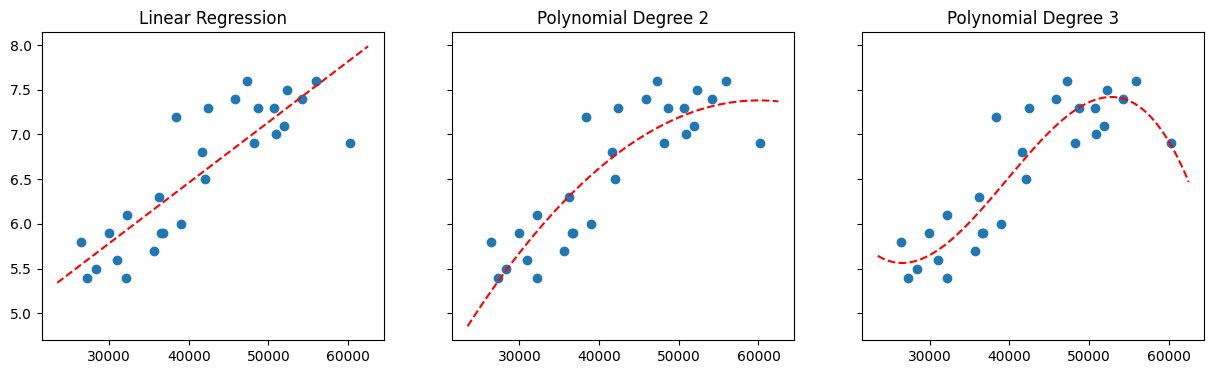

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

np.random.seed(42)

# Download and prepare the data
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

# Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Polynomial Degree 2 Model
poly_features2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly2 = poly_features2.fit_transform(X)
model2 = LinearRegression()
model2.fit(X_poly2, y)

# Polynomial Degree 3 Model
poly_features3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly3 = poly_features3.fit_transform(X)
model3 = LinearRegression()
model3.fit(X_poly3, y)

# Predictions
X_lin = np.linspace(23_500, 62_500, 100).reshape(100, 1)
y_lin = model.predict(X_lin)

y_poly2 = model2.predict(poly_features2.transform(X_lin))
y_poly3 = model3.predict(poly_features3.transform(X_lin))

# MSE & RMSE
y_lin_pred = model.predict(X)
y_poly2_pred = model2.predict(X_poly2)
y_poly3_pred = model3.predict(X_poly3)

mse_lin = mean_squared_error(y, y_lin_pred)
mse_poly2 = mean_squared_error(y, y_poly2_pred)
mse_poly3 = mean_squared_error(y, y_poly3_pred)

rmse_lin = np.sqrt(mse_lin)
rmse_poly2 = np.sqrt(mse_poly2)
rmse_poly3 = np.sqrt(mse_poly3)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

axes[0].scatter(X, y)
axes[0].plot(X_lin, y_lin, "r--")
axes[0].set_title("Linear Regression")

axes[1].scatter(X, y)
axes[1].plot(X_lin, y_poly2, "r--")
axes[1].set_title("Polynomial Degree 2")

axes[2].scatter(X, y)
axes[2].plot(X_lin, y_poly3, "r--")
axes[2].set_title("Polynomial Degree 3")

plt.show()